# Project Structure  

## Step 0: Load Datasets
## Non Canonical
- ### Load Broadcast Ali
- ### Load Broadcast AWS
- ### Load Uncles
- ### Load Forked

## Canonical
- ### Load Canonical

## Step 1: Basic Analysis
- ### Analyse basic status of the broadcast dataset
- ### Collect all zero gasUsed blocks from broadcast

## Step 2: Clean and Prepare Data
- ### Delete broadcast blocks who are out of the canonical time range
- ### Get broadcast between canonical starting and ending time period
- ### Analyze blocks' uncle numbers and we think we need a further discussion on that if this factor should be saved.
- ### Keep four dfs in same columns
- ### Label canonical as 0 and others as 1
- ### Combine dataframes as one dataset

## Step 3: Apply Models
- ### Random Forest
- ### Logistic Regression
- ### K fold Cross Validation
- ### Logistic Regression with Cross Validation

## Step 4: Analyze Features
- ### size
- ### miner
- ### Analyze relationship between factors and the corresponding value

In [4]:
import pandas as pd
import json
import configparser
import numpy as np
import os

In [67]:
config_path = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/env.conf'
# config_path = '/Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/env.conf'
config = configparser.ConfigParser()
config.read(config_path)

# we use json paths in this project
UNCLE_PATH = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/uncle/'
CANONICAL_PATH = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/'
FORKED_PATH = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/'
BROADCAST_ALI_PATH = config.get('broadcast_ali', 'json_path')
BROADCAST_AWS_PATH = config.get('broadcast_aws', 'json_path')

BROADCAST_PATH = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/broadcast/'

## Step  0: Load Datasets

### Load Broadcast

In [68]:

broadcast_df = None

for filename in sorted(os.listdir(BROADCAST_PATH)):
    if filename.endswith(".txt"):
        print('loading ', filename)
        new_broadcast = pd.read_json(BROADCAST_PATH + filename, lines=True, dtype=False)
        broadcast_df = pd.concat([broadcast_df, new_broadcast], ignore_index=True)

print(broadcast_df.shape)
broadcast_df.head()

loading  0.txt
loading  40000.txt
loading  6090000.txt
loading  6120000.txt
loading  6130000.txt
loading  6170000.txt
loading  6200000.txt
loading  6210000.txt
loading  6220000.txt
loading  6230000.txt
loading  6240000.txt
loading  6260000.txt
loading  6270000.txt
loading  6280000.txt
loading  6310000.txt
loading  8110000.txt
loading  8120000.txt
loading  8130000.txt
loading  8140000.txt
loading  8150000.txt
loading  8160000.txt
loading  8170000.txt
loading  8180000.txt
loading  8190000.txt
loading  8200000.txt
loading  8210000.txt
loading  8240000.txt
loading  8250000.txt
loading  8260000.txt
loading  8270000.txt
loading  8280000.txt
loading  8290000.txt
loading  8310000.txt
loading  8320000.txt
loading  8330000.txt
loading  8340000.txt
loading  8350000.txt
loading  8360000.txt
loading  8370000.txt
loading  8380000.txt
loading  8390000.txt
loading  8400000.txt
loading  8410000.txt
loading  8420000.txt
loading  8430000.txt
loading  8440000.txt
loading  8450000.txt
loading  8460000.txt


,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum
0,16971378211,5075,0,0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...,0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45,25,0x10c8,0.0,0,0
1,17171480576,5003,0,0x700aadd703c81b067d39422f793f2d694afbfd72156a...,0x0A0393d4f9988126EEEc6d2B47c816e633a20C22,1,0x10d8,0.0,0,0
2,17163096064,5000,0,0xb495a1d7e6663152ae92708da4843337b958146015a2...,0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C,2,0x1100,0.0,0,0
3,17154715646,5009,0,0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...,0x41F872e72813b24C2986aed888e76638264de0b9,3,0x10c8,0.0,0,0
4,1378675664031,0x13c1,0x0,0x6657c87909f45c0b7654cf02982b14a355075bc9f25d...,0x5928E011c3B8fc8bEf32d5B86A19F2A54c5BE654,41915,0x10c8,0.0,0,0


### Load Uncles

In [69]:

uncle_df = None

for filename in sorted(os.listdir(UNCLE_PATH)):
    if filename.endswith(".txt"):
        print('loading ', filename)
        new_uncles = pd.read_json(UNCLE_PATH + filename, lines=True)
        uncle_df = pd.concat([uncle_df, new_uncles], ignore_index=True)

print(uncle_df.shape)
uncle_df.head()

loading  7200000.txt
loading  7210000.txt
loading  7220000.txt
loading  7230000.txt
loading  7240000.txt
loading  7250000.txt
loading  7260000.txt
loading  7270000.txt
loading  7280000.txt
loading  7290000.txt
loading  7300000.txt
loading  7310000.txt
loading  7320000.txt
loading  7330000.txt
loading  7340000.txt
loading  7350000.txt
loading  7360000.txt
loading  7370000.txt
loading  7380000.txt
loading  7390000.txt
loading  7400000.txt
loading  7410000.txt
loading  7420000.txt
loading  7430000.txt
loading  7440000.txt
loading  7450000.txt
loading  7460000.txt
loading  7470000.txt
loading  7480000.txt
loading  7490000.txt
loading  7500000.txt
loading  7510000.txt
loading  7520000.txt
loading  7530000.txt
loading  7540000.txt
loading  7550000.txt
loading  7560000.txt
loading  7570000.txt
loading  7580000.txt
loading  7590000.txt
loading  7600000.txt
loading  7610000.txt
loading  7620000.txt
loading  7630000.txt
loading  7640000.txt
loading  7650000.txt
loading  7660000.txt
loading  7670

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum
0,0x8886feaa77f19,7992222,5902995,0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a6...,0xcc16e3c00dbbe76603fa833ec20a48f786dfe610,7200009,521,0.0,0,0
1,0x88cd0ecd9f73e,8000029,7994199,0x4e440909390986585b35a53b31d285c95899710b9ba6...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7200023,541,0.0,0,0
2,0x895a97bdabd2c,8000029,5743895,0x1e48f03f15d604bcecade135e218821d8d3c243f7a6a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,7200034,538,0.0,0,0
3,0x8a7418c515067,8000025,7980364,0x8d9a618adde95515b851c248d8a94b73e766af5ea184...,0x829bd824b016326a401d083b33d092293333a830,7200072,540,0.0,0,0
4,0x8ae6afe6cb82d,8007811,8003275,0xea126eb6612905daeb5241d7222ce28b236f4dfb25c6...,0x829bd824b016326a401d083b33d092293333a830,7200090,536,0.0,0,0


### Load Forked

In [70]:
forked_df = None

for filename in sorted(os.listdir(FORKED_PATH)):
    if filename.endswith(".txt"):
        print('loading ', FORKED_PATH + filename)
        new_forked = pd.read_json(FORKED_PATH + filename, lines=True)
        forked_df = pd.concat([forked_df, new_forked], ignore_index=True)

print(forked_df.shape)
forked_df.head()

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2110000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2120000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2130000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2140000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2150000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2160000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2170000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2180000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2830000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2840000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2850000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2860000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2870000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2880000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2890000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2900000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3530000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3540000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3550000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3560000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3570000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3580000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3590000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3600000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4300000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4310000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4320000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4330000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4340000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4350000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4360000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4370000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5090000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5100000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5110000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5120000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5130000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5140000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5150000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5160000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5790000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5800000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5810000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5820000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5830000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5840000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5850000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5860000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6560000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6570000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6580000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6590000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6600000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6610000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6620000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6630000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7440000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7450000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7460000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7470000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7480000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7490000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7500000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7510000.txt
loading  /Users/Jinyue/Documents/go-ethe

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum
0,63331537494188,4712388,0,0xebeabb2e972e6dfe1f3cc7d6eeea5006cea363a24dd4...,0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb,2115684,541,0.0,0,0
1,63580290188712,4703192,21000,0xc3a168aebfe6a19ca3063527a5eb990a56de91d74b69...,0x2a65aca4d5fc5b5c859090a6c34d164135398226,2115626,1179,0.0,0,0
2,63240211856690,4712379,0,0x81181666515c77a112739d09736e4db495d7b27b0143...,0x61c808d82a3ac53231750dadc13c777b59310bd9,2115562,532,0.0,0,0
3,63706474698380,4712388,105000,0xd7aecb487cef45ab492f18e78ae41be0e3f9f8d7e617...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2115478,2170,0.0,0,0
4,63737682040116,4712388,321022,0x16edcf526068f01be55c7200fb7dff56145a32a8dd3b...,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,2115467,2138,0.0,0,0


### Load Canonical

In [71]:
canonical_df = None

for filename in sorted(os.listdir(CANONICAL_PATH)):
    if filename.endswith(".txt"):
        print('loading ', CANONICAL_PATH + filename)
        new_canonical = pd.read_json(CANONICAL_PATH + filename, lines=True)
        canonical_df = pd.concat([canonical_df, new_canonical], ignore_index=True)

print(canonical_df.shape)
canonical_df.head()

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6830000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6840000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6850000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6860000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6870000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6880000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6890000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6900000.txt
loading  /Users/

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7500000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7510000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7520000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7530000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7540000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7550000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7560000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7570000.txt
loading  /Users/

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8170000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8180000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8190000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8200000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8210000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8220000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8230000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8240000.txt
loading  /Users/

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum
0,0x88622c2bfedab,8000029,7999694,0xa74abd1fe708da69f311447bde33193e9b23af3a6eec...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,6839999,30787,0.0,183,0
1,0x88723a734d445,7994877,742283,0xd6a9a861552586be4f4ecbaf14754d142bb1887e67f8...,0x2a5994b501e6a560e727b6c2de5d856396aadd38,6839998,3598,0.0,15,0
2,0x88713a734d445,8000029,1815372,0xc8958f7838145975ab421e3a0c08a4eeab955233fd63...,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,6839997,7253,0.0,46,0
3,0x88814a9ca0d86,8000000,7985081,0x423d96a9aaf78b780bd0bb93a25a45a57260f16b1106...,0x2a65aca4d5fc5b5c859090a6c34d164135398226,6839996,19764,0.0,127,0
4,0x886f3cb50a372,8000000,7610034,0xbee381dabfe10ec32d6d28cd34c1c7200d0593f84d0d...,0x829bd824b016326a401d083b33d092293333a830,6839995,28231,0.0,194,0


## Step 1: Basic Analysis

Feature list:  
1. uncleNum 
2. txNum 
3. timestamp diff  
4. size 
5. number 
6. miner  
7. gasUsed 
8. gasLimit 
9. difficulty

### Analyse basic status of the broadcast dataset   

#### Broadcast Dataframe columns

In [92]:
broadcast_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

#### Find broadcast height range

In [97]:
print(max(broadcast_df.number))
print(min(broadcast_df.number))

8997231
1


#### Broadcast height distribution

In [98]:
broadcast_df.number.describe()

count    4.048800e+05
mean     8.558960e+06
std      1.431152e+05
min      1.000000e+00
25%      8.462265e+06
50%      8.563458e+06
75%      8.664678e+06
max      8.997231e+06
Name: number, dtype: float64

#### Broadcast Blocks info with max and min heights

In [99]:
print(broadcast_df.number.idxmax())
print(broadcast_df.number.idxmin())

404878
1


In [100]:
highest_block = broadcast_df.iloc[404878]
lowest_block = broadcast_df.iloc[1]

In [109]:
highest_block

difficulty                                      121752483473963
gasLimit                                                8000029
gasUsed                                                       0
hash          0xc0d4b276fcbcde7bf366c0796ee84622432d38e82277...
miner                0x9EAb4b0fC468A7f5D46228bf5a76cB52370d068D
number                                                  8997231
size                                                     0x1088
timestamp                                                     0
txNum                                                         0
uncleNum                                                      0
Name: 404878, dtype: object

In [101]:
lowest_block

difficulty                                          17171480576
gasLimit                                                   5003
gasUsed                                                       0
hash          0x700aadd703c81b067d39422f793f2d694afbfd72156a...
miner                0x0A0393d4f9988126EEEc6d2B47c816e633a20C22
number                                                        1
size                                                     0x10d8
timestamp                                                     0
txNum                                                         0
uncleNum                                                      0
Name: 1, dtype: object

In [102]:
print('highest blick hash: ', highest_block.hash)
print('lowest block hash: ', lowest_block.hash)

highest blick hash:  0xc0d4b276fcbcde7bf366c0796ee84622432d38e8227763ede20a92951b009c9e
lowest block hash:  0x700aadd703c81b067d39422f793f2d694afbfd72156ab6c41689cdc1d07d9578


In [103]:
print('highest block gasLimit: ', highest_block.gasLimit)
print('lowest block gasLimit: ', lowest_block.gasLimit)

highest block gasLimit:  8000029
lowest block gasLimit:  5003


In [104]:
print('highest block gasUsed: ', highest_block.gasUsed)
print('lowest block gasUsed: ', lowest_block.gasUsed)

highest block gasUsed:  0
lowest block gasUsed:  0


In [105]:
from datetime import datetime

print('highest block timestamp difference: ', highest_block.timestamp)
print('lowest block timestamp difference: ', lowest_block.timestamp)

highest block timestamp difference:  0.0
lowest block timestamp difference:  0.0


In [106]:
print('highest block miner: ', highest_block.miner)
print('lowest block miner: ', lowest_block.miner)

highest block miner:  0x9EAb4b0fC468A7f5D46228bf5a76cB52370d068D
lowest block miner:  0x0A0393d4f9988126EEEc6d2B47c816e633a20C22


### Collect all zero gasUsed blocks from broadcast
We find it is interesting that many blocks are 0 in gasUsed column. And they don't wrap any txs, which means the blocks are empty. The reason is miners are doing the SPV Mining. Miners just want to get the block reward and ignore the waiting txs.  
Blocks with 0 gasUsed appear in both broadcast and canonical datasets.

In [110]:
zero_gasUsed_blocks = broadcast_df.loc[broadcast_df.gasUsed == 0]

In [111]:
zero_gasUsed_blocks.to_csv('zero_gasUsed_blocks.csv')

In [112]:
zero_gasUsed_blocks.head()

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum
0,16971378211,5075,0,0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...,0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45,25,0x10c8,0.0,0,0
1,17171480576,5003,0,0x700aadd703c81b067d39422f793f2d694afbfd72156a...,0x0A0393d4f9988126EEEc6d2B47c816e633a20C22,1,0x10d8,0.0,0,0
2,17163096064,5000,0,0xb495a1d7e6663152ae92708da4843337b958146015a2...,0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C,2,0x1100,0.0,0,0
3,17154715646,5009,0,0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...,0x41F872e72813b24C2986aed888e76638264de0b9,3,0x10c8,0.0,0,0
8,131072,6283192,0,0x0ad0c10e9adfa0246156ec4ef612d3f2dc6ccf1f0c8c...,0x9f97783b4Fa9663fCcdaC1411cD3488F0B609068,6170160,0x31eb,0.0,0,0


In [113]:
zero_gasUsed_blocks.shape

(15356, 10)

In [114]:
canonical_df.shape

(1537179, 10)

In [115]:
canonical_df.gasUsed.describe()

count    1.537179e+06
mean     6.578537e+06
std      2.462412e+06
min      0.000000e+00
25%      6.233308e+06
50%      7.980697e+06
75%      7.991907e+06
max      8.073919e+06
Name: gasUsed, dtype: float64

In [116]:
zero_gasUsed_canonical = canonical_df.loc[canonical_df.gasUsed == 0]

In [117]:
zero_gasUsed_canonical.shape

(27773, 10)

## Step 2: Clean and Prepare Data

In [119]:
max(broadcast_df.number)

8997231

In [118]:
max(canonical_df.number)

8369850

In [120]:
max(uncle_df.number)

7999992

In [121]:
max(forked_df.number)

8229264

### Delete broadcast blocks who are out of the canonical height range  
When broadcast blocks are in pending, we cannot label them as (canonical) 0 or (non canonical) 1. So, just delete them.

### Get broadcast before canonical max height

In [383]:
raw_broadcast_df = broadcast_df.loc[broadcast_df.number <= max(canonical_df.number)]
print('original broadcast size: ', broadcast_df.shape)
print('cleaned broadcast size: ', raw_broadcast_df.shape)
print('max broadcast height: ', max(raw_broadcast_df.number))

original broadcast size:  (404880, 10)
cleaned broadcast size:  (8785, 10)
max broadcast height:  8369816


### Delete canonical blocks from broadcast block dataset
Hash values are random numbers and they should not be considered as a factor to affect the result. 

In [384]:
cond = raw_broadcast_df['hash'].isin(canonical_df['hash']) == True
raw_broadcast_df.drop(raw_broadcast_df[cond].index, inplace=True)

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [385]:
str_counter = 0
hex_str_counter = 0
str_list = []
hex_str_list = []

for gaslimit in raw_broadcast_df.gasLimit:
    if type(gaslimit) == type('str'):
        str_counter += 1
        if gaslimit.startswith('0x'):
            hex_str_counter += 1
            hex_str_list.append(gaslimit)
        else:
            str_list.append(gaslimit)
        
print(str_counter)
print(hex_str_counter)
print(raw_broadcast_df.shape)
print(hex_str_list)
print(str_list)

6417
6417
(8785, 10)
['0x13c1', '0x5fdfb8', '0x5fdfb8', '0x5fdfb8', '0x7a6da1', '0x7a121d', '0x7a1200', '0x7a1200', '0x7a1200', '0x7a121d', '0x7a1200', '0x7a6dbd', '0x7a66eb', '0x7a1200', '0x7a3083', '0x7a1200', '0x7a1200', '0x7a1200', '0x7a2125', '0x7a3083', '0x7a121d', '0x7a1200', '0x7a1200', '0x7a1200', '0x7a8c24', '0x7a4af3', '0x7a7732', '0x7a121d', '0x7a121d', '0x7a121d', '0x7a1200', '0x7a1200', '0x7a121d', '0x7a1200', '0x7a1200', '0x7a1937', '0x7a1200', '0x7a121d', '0x7a2158', '0x7a1200', '0x7a1200', '0x7a1200', '0x7a1200', '0x7a121d', '0x7a121d', '0x7a1200', '0x7a309c', '0x7a121d', '0x7a1200', '0x7a1200', '0x7a121d', '0x7a1200', '0x7a121d', '0x7a2158', '0x7a1200', '0x7a1200', '0x7a30a0', '0x7a121d', '0x7a1200', '0x7a213c', '0x7a1200', '0x7a1200', '0x7a3083', '0x7a1200', '0x7a3861', '0x7a19d4', '0x7a121d', '0x7a1200', '0x7a2143', '0x7a1200', '0x7a121d', '0x7a121d', '0x7a121d', '0x7a1200', '0x7a2a83', '0x7a121d', '0x7a309c', '0x7a1211', '0x7a3083', '0x7a121d', '0x7a1200', '0x7a34c

**As shown in the cell above, we can find that there are 6417 hex string in gasLimit column. We need to convert them to decimal.**

In [386]:
tmp_gasLimit_list = []

for gaslimit in raw_broadcast_df.gasLimit:
    if type(gaslimit) == type('str'):
        tmp_gasLimit_list.append(int(gaslimit, 16))
    else:
        tmp_gasLimit_list.append(gaslimit)

print(len(tmp_gasLimit_list))
print(len(raw_broadcast_df.gasLimit))
print(tmp_gasLimit_list)

8785
8785
[5075, 5003, 5000, 5009, 5057, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 6283192, 62831

In [387]:
raw_broadcast_df.gasLimit = tmp_gasLimit_list

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Similarly, let's check gasUsed column in raw_broadcast_df**

In [388]:
str_counter = 0
hex_str_counter = 0
str_list = []
hex_str_list = []

for gasusd in raw_broadcast_df.gasUsed:
    if type(gasusd) == type('str'):
        str_counter += 1
        if gasusd.startswith('0x'):
            hex_str_counter += 1
            hex_str_list.append(gasusd)
        else:
            str_list.append(gasusd)
        
print(str_counter)
print(hex_str_counter)
print(raw_broadcast_df.shape)
print(hex_str_list)
print(str_list)

6417
6417
(8785, 10)
['0x0', '0x0', '0x0', '0x0', '0x7a1078', '0x79d852', '0x79c5da', '0x5f8ff9', '0x59e418', '0x799f49', '0x79f4ba', '0x3b5450', '0x7a373f', '0x79e0f3', '0x272c2d', '0x7a11d6', '0x7a00ef', '0x79dbe6', '0x79e369', '0x74dd8d', '0x7a0c3c', '0x7a067b', '0x79c593', '0x31d4ce', '0x4f7e0e', '0x77f912', '0x703c6e', '0x79c82a', '0x796903', '0x7952cb', '0x79d863', '0x79eab3', '0x79f7a0', '0x79c599', '0x79cdeb', '0x79e8f7', '0x79cf03', '0x79c180', '0x68901a', '0x79c27e', '0x79d70d', '0x7840ff', '0x789aa4', '0x79e79d', '0x79e3f5', '0x79ffda', '0x75a101', '0x79d0f1', '0x0', '0x178ca9', '0x79f5b8', '0x460993', '0x79f27b', '0x787d75', '0x7a0f0d', '0x79bd7c', '0x758f91', '0x7a00a4', '0x79fe56', '0x35c8eb', '0x442211', '0xdbdd3', '0x79e15f', '0x52fa6c', '0x78cb66', '0x699677', '0x793a45', '0x7a0188', '0x79a268', '0x6e6bb9', '0x79b3ca', '0x79500b', '0x78a738', '0x497bc3', '0x190845', '0x6e41ba', '0x79ac7c', '0x2e31c0', '0x1ead2', '0x79bd5e', '0x5d172b', '0x7a2abb', '0x7a07bf', '0x5cf959

In [392]:
tmp_gasUsed_list = []

for gasused in raw_broadcast_df.gasUsed:
    if type(gasused) == type('str'):
        tmp_gasUsed_list.append(int(gasused, 16))
    else:
        tmp_gasUsed_list.append(gasused)

print(len(tmp_gasUsed_list))
print(len(raw_broadcast_df.gasUsed))
print(tmp_gasUsed_list)
raw_broadcast_df.gasUsed = tmp_gasUsed_list

8785
8785
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23192, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21000, 21000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Similarly, let's convert size in raw broadcast df**

In [406]:
str_counter = 0
hex_str_counter = 0
str_list = []
hex_str_list = []

for sz in raw_broadcast_df['size']:
    if type(sz) == type('str'):
        str_counter += 1
        if sz.startswith('0x'):
            hex_str_counter += 1
            hex_str_list.append(sz)
        else:
            str_list.append(sz)
        
print(str_counter)
print(hex_str_counter)
print(raw_broadcast_df.shape)
print(hex_str_list)
print(str_list)

8785
8785
(8785, 11)
['0x10c8', '0x10d8', '0x1100', '0x10c8', '0x10c8', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x375c', '0x31eb', '0x323d', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x323d', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb', '0x31eb'

In [393]:
raw_broadcast_df.uncleNum.describe()

count     8785
unique       4
top          0
freq      5968
Name: uncleNum, dtype: object

In [394]:
uncle_df.uncleNum.describe()


count    58346.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: uncleNum, dtype: float64

In [395]:
canonical_df.uncleNum.describe()

count    1.537179e+06
mean     7.328945e-02
std      2.769415e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+00
Name: uncleNum, dtype: float64

### Get uncle columns

In [396]:
uncle_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum', 'label'],
      dtype='object')

### Get canonical columns

In [144]:
canonical_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

### Get forked columns

In [145]:
forked_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

### Get Broadcast columns

In [409]:
raw_broadcast_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum', 'label'],
      dtype='object')

In [401]:
print('canonical df shape: ', canonical_df.shape)
print('uncle df shape: ', uncle_df.shape)
print('broadcast df shape: ', raw_broadcast_df.shape)
print('forked df shape: ', forked_df.shape)
print('canonical number: ', canonical_df.shape[0], ', non canonical number: ', uncle_df.shape[0]+broadcast_df.shape[0]+forked_df.shape[0])
print('canonical is ', canonical_df.shape[0]/(uncle_df.shape[0]+broadcast_df.shape[0]+forked_df.shape[0]), ' times of non canonical')

canonical df shape:  (1537179, 11)
uncle df shape:  (58346, 11)
broadcast df shape:  (8785, 11)
forked df shape:  (79242, 11)
canonical number:  1537179 , non canonical number:  542468
canonical is  2.8336768251767848  times of non canonical


#### Since canonical df has the majority of number in blocks, we decide to use canonical df as the standard pattern to match forked df.

In [320]:
print('unique miner: ', len(canonical_df.miner.unique()))

unique miner:  484


In [321]:
canonical_miners = canonical_df.groupby('miner')
len(canonical_miners)

484

### Label canonical as 0 and others as 1

In [156]:
canonical_df['label'] = 0
canonical_df.head()

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum,label
0,0x88622c2bfedab,8000029,7999694,0xa74abd1fe708da69f311447bde33193e9b23af3a6eec...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,6839999,30787,0.0,183,0,0
1,0x88723a734d445,7994877,742283,0xd6a9a861552586be4f4ecbaf14754d142bb1887e67f8...,0x2a5994b501e6a560e727b6c2de5d856396aadd38,6839998,3598,0.0,15,0,0
2,0x88713a734d445,8000029,1815372,0xc8958f7838145975ab421e3a0c08a4eeab955233fd63...,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,6839997,7253,0.0,46,0,0
3,0x88814a9ca0d86,8000000,7985081,0x423d96a9aaf78b780bd0bb93a25a45a57260f16b1106...,0x2a65aca4d5fc5b5c859090a6c34d164135398226,6839996,19764,0.0,127,0,0
4,0x886f3cb50a372,8000000,7610034,0xbee381dabfe10ec32d6d28cd34c1c7200d0593f84d0d...,0x829bd824b016326a401d083b33d092293333a830,6839995,28231,0.0,194,0,0


In [157]:
uncle_df['label'] = 1
uncle_df.head()

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum,label
0,0x8886feaa77f19,7992222,5902995,0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a6...,0xcc16e3c00dbbe76603fa833ec20a48f786dfe610,7200009,521,0.0,0,0,1
1,0x88cd0ecd9f73e,8000029,7994199,0x4e440909390986585b35a53b31d285c95899710b9ba6...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7200023,541,0.0,0,0,1
2,0x895a97bdabd2c,8000029,5743895,0x1e48f03f15d604bcecade135e218821d8d3c243f7a6a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,7200034,538,0.0,0,0,1
3,0x8a7418c515067,8000025,7980364,0x8d9a618adde95515b851c248d8a94b73e766af5ea184...,0x829bd824b016326a401d083b33d092293333a830,7200072,540,0.0,0,0,1
4,0x8ae6afe6cb82d,8007811,8003275,0xea126eb6612905daeb5241d7222ce28b236f4dfb25c6...,0x829bd824b016326a401d083b33d092293333a830,7200090,536,0.0,0,0,1


In [158]:
forked_df['label'] = 1
forked_df.head()

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum,label
0,63331537494188,4712388,0,0xebeabb2e972e6dfe1f3cc7d6eeea5006cea363a24dd4...,0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb,2115684,541,0.0,0,0,1
1,63580290188712,4703192,21000,0xc3a168aebfe6a19ca3063527a5eb990a56de91d74b69...,0x2a65aca4d5fc5b5c859090a6c34d164135398226,2115626,1179,0.0,0,0,1
2,63240211856690,4712379,0,0x81181666515c77a112739d09736e4db495d7b27b0143...,0x61c808d82a3ac53231750dadc13c777b59310bd9,2115562,532,0.0,0,0,1
3,63706474698380,4712388,105000,0xd7aecb487cef45ab492f18e78ae41be0e3f9f8d7e617...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2115478,2170,0.0,0,0,1
4,63737682040116,4712388,321022,0x16edcf526068f01be55c7200fb7dff56145a32a8dd3b...,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,2115467,2138,0.0,0,0,1


In [402]:
raw_broadcast_df['label'] = 1
raw_broadcast_df.head()

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum,label
0,16971378211,5075,0,0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...,0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45,25,0x10c8,0.0,0,0,1
1,17171480576,5003,0,0x700aadd703c81b067d39422f793f2d694afbfd72156a...,0x0A0393d4f9988126EEEc6d2B47c816e633a20C22,1,0x10d8,0.0,0,0,1
2,17163096064,5000,0,0xb495a1d7e6663152ae92708da4843337b958146015a2...,0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C,2,0x1100,0.0,0,0,1
3,17154715646,5009,0,0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...,0x41F872e72813b24C2986aed888e76638264de0b9,3,0x10c8,0.0,0,0,1
4,1378675664031,5057,0,0x6657c87909f45c0b7654cf02982b14a355075bc9f25d...,0x5928E011c3B8fc8bEf32d5B86A19F2A54c5BE654,41915,0x10c8,0.0,0,0,1


### Change data type in dataframes

#### canonical df

In [322]:
print('original canonical df feature difficulty data type and value')
print(type(canonical_df['difficulty'][0]))
print(canonical_df['difficulty'][0])

original canonical df feature difficulty data type and value
<class 'numpy.int64'>
2399283668053419


In [168]:
canonical_df['difficulty'] = canonical_df.difficulty.apply(lambda x: int(x, 16))

In [169]:
print('original canonical df feature timestamp difference data type and value')
print(type(canonical_df['timestamp'][0]))
print(canonical_df['timestamp'][0])

original canonical df feature timestamp data type and value
<class 'numpy.float64'>
0.0


#### As shown, the timestamp difference data type is float, so do nothing. 

In [323]:
for column in canonical_df.columns:
    print(column, type(canonical_df[column][0]), ', ', canonical_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  2399283668053419 

gasLimit <class 'numpy.int64'> ,  8000029 

gasUsed <class 'numpy.int64'> ,  7999694 

hash <class 'str'> ,  0xa74abd1fe708da69f311447bde33193e9b23af3a6eec05989d3fb07d0f6311cc 

miner <class 'str'> ,  0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c 

number <class 'numpy.int64'> ,  6839999 

size <class 'numpy.int64'> ,  30787 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  183 

uncleNum <class 'numpy.int64'> ,  0 

label <class 'numpy.int64'> ,  0 



#### forked df

In [324]:
for column in forked_df.columns:
    print(column, type(forked_df[column][0]), ', ', forked_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  63331537494188 

gasLimit <class 'numpy.int64'> ,  4712388 

gasUsed <class 'numpy.int64'> ,  0 

hash <class 'str'> ,  0xebeabb2e972e6dfe1f3cc7d6eeea5006cea363a24dd4ffc58ab18a621c9b4596 

miner <class 'str'> ,  0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb 

number <class 'numpy.int64'> ,  2115684 

size <class 'numpy.int64'> ,  541 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  0 

uncleNum <class 'numpy.int64'> ,  0 

label <class 'numpy.int64'> ,  1 



**As shown above, all features are in the required datatype. So we don't have to change forked dataframe.**

#### uncle df

In [325]:
for column in uncle_df.columns:
    print(column, type(uncle_df[column][0]), ', ', uncle_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  2401814073278233 

gasLimit <class 'numpy.int64'> ,  7992222 

gasUsed <class 'numpy.int64'> ,  5902995 

hash <class 'str'> ,  0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a64f66582147ec8e73529a 

miner <class 'str'> ,  0xcc16e3c00dbbe76603fa833ec20a48f786dfe610 

number <class 'numpy.int64'> ,  7200009 

size <class 'numpy.int64'> ,  521 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  0 

uncleNum <class 'numpy.int64'> ,  0 

label <class 'numpy.int64'> ,  1 



**uncle df difficulty is str but we want int**

In [183]:
uncle_df['difficulty'] = uncle_df.difficulty.apply(lambda x: int(x, 16))

In [326]:
for column in uncle_df.columns:
    print(column, type(uncle_df[column][0]), ', ', uncle_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  2401814073278233 

gasLimit <class 'numpy.int64'> ,  7992222 

gasUsed <class 'numpy.int64'> ,  5902995 

hash <class 'str'> ,  0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a64f66582147ec8e73529a 

miner <class 'str'> ,  0xcc16e3c00dbbe76603fa833ec20a48f786dfe610 

number <class 'numpy.int64'> ,  7200009 

size <class 'numpy.int64'> ,  521 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  0 

uncleNum <class 'numpy.int64'> ,  0 

label <class 'numpy.int64'> ,  1 



In [185]:
uncle_df.head()

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum,label
0,2401814073278233,7992222,5902995,0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a6...,0xcc16e3c00dbbe76603fa833ec20a48f786dfe610,7200009,521,0.0,0,0,1
1,2406628768479038,8000029,7994199,0x4e440909390986585b35a53b31d285c95899710b9ba6...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7200023,541,0.0,0,0,1
2,2416354973629740,8000029,5743895,0x1e48f03f15d604bcecade135e218821d8d3c243f7a6a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,7200034,538,0.0,0,0,1
3,2435699782537319,8000025,7980364,0x8d9a618adde95515b851c248d8a94b73e766af5ea184...,0x829bd824b016326a401d083b33d092293333a830,7200072,540,0.0,0,0,1
4,2443574371989549,8007811,8003275,0xea126eb6612905daeb5241d7222ce28b236f4dfb25c6...,0x829bd824b016326a401d083b33d092293333a830,7200090,536,0.0,0,0,1


#### broadcast df

In [400]:
for column in raw_broadcast_df.columns:
    print(column, type(raw_broadcast_df[column][0]), ', ', raw_broadcast_df[column][0], '\n')

difficulty <class 'str'> ,  16971378211 

gasLimit <class 'numpy.int64'> ,  5075 

gasUsed <class 'numpy.int64'> ,  0 

hash <class 'str'> ,  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a52c9dd95481b8183b3879 

miner <class 'str'> ,  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45 

number <class 'numpy.int64'> ,  25 

size <class 'str'> ,  0x10c8 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'int'> ,  0 

uncleNum <class 'int'> ,  0 

label <class 'numpy.int64'> ,  1 



**Same problem here, we need difficulty in int type instead of str**

In [410]:
raw_broadcast_df.head()

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum,label
0,16971378211,5075,0,0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...,0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45,25,4296,0.0,0,0,1
1,17171480576,5003,0,0x700aadd703c81b067d39422f793f2d694afbfd72156a...,0x0A0393d4f9988126EEEc6d2B47c816e633a20C22,1,4312,0.0,0,0,1
2,17163096064,5000,0,0xb495a1d7e6663152ae92708da4843337b958146015a2...,0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C,2,4352,0.0,0,0,1
3,17154715646,5009,0,0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...,0x41F872e72813b24C2986aed888e76638264de0b9,3,4296,0.0,0,0,1
4,1378675664031,5057,0,0x6657c87909f45c0b7654cf02982b14a355075bc9f25d...,0x5928E011c3B8fc8bEf32d5B86A19F2A54c5BE654,41915,4296,0.0,0,0,1


In [411]:
raw_broadcast_df.isnull().sum()

difficulty    0
gasLimit      0
gasUsed       0
hash          0
miner         0
number        0
size          0
timestamp     0
txNum         0
uncleNum      0
label         0
dtype: int64

In [412]:
import numpy as np

tmp_array = np.where(raw_broadcast_df['difficulty']=='')
print(len(tmp_array[0]))
tmp_array = tmp_array[0]
print(len(tmp_array))
tmp_array = list(map(int, tmp_array))

1591
1591


**As we can see, there are empty string in difficulty column and it is 1/3 of the raw_broadcast size. For now, let's drop it**

In [413]:
print(tmp_array[0])
raw_broadcast_df.iloc[tmp_array[0]]

328


difficulty                                                     
gasLimit                                                8023457
gasUsed                                                 7999608
hash          0xf2fb1ece1f1b70095571502980078f1aca053ae72080...
miner                0x829BD824B016326A401d083B33D092293333A830
number                                                  8111545
size                                                     294748
timestamp                                                     0
txNum                                                       175
uncleNum                                                      0
label                                                         1
Name: 328, dtype: object

In [414]:
raw_broadcast_df = raw_broadcast_df[raw_broadcast_df.difficulty != '']

In [415]:
raw_broadcast_df.shape

(7194, 11)

In [416]:
raw_broadcast_df['difficulty'] = raw_broadcast_df['difficulty'].astype(int)

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [417]:
raw_broadcast_df['size'] = raw_broadcast_df['size'].apply(int, base=16)

TypeError: int() can't convert non-string with explicit base

In [419]:
for column in raw_broadcast_df.columns:
    print(column, type(raw_broadcast_df[column][0]), ', ', raw_broadcast_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  16971378211 

gasLimit <class 'numpy.int64'> ,  5075 

gasUsed <class 'numpy.int64'> ,  0 

hash <class 'str'> ,  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a52c9dd95481b8183b3879 

miner <class 'str'> ,  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45 

number <class 'numpy.int64'> ,  25 

size <class 'numpy.int64'> ,  4296 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'int'> ,  0 

uncleNum <class 'int'> ,  0 

label <class 'numpy.int64'> ,  1 



In [337]:
raw_broadcast_df.head()

,difficulty,gasLimit,gasUsed,hash,miner,number,size,timestamp,txNum,uncleNum
0,16971378211,5075,0,0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...,0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45,25,4296,0.0,0,0
1,17171480576,5003,0,0x700aadd703c81b067d39422f793f2d694afbfd72156a...,0x0A0393d4f9988126EEEc6d2B47c816e633a20C22,1,4312,0.0,0,0
2,17163096064,5000,0,0xb495a1d7e6663152ae92708da4843337b958146015a2...,0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C,2,4352,0.0,0,0
3,17154715646,5009,0,0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...,0x41F872e72813b24C2986aed888e76638264de0b9,3,4296,0.0,0,0
4,1378675664031,5057,0x0,0x6657c87909f45c0b7654cf02982b14a355075bc9f25d...,0x5928E011c3B8fc8bEf32d5B86A19F2A54c5BE654,41915,4296,0.0,0,0


### Combine them as one dataset

In [420]:
result = pd.concat([canonical_df, uncle_df, forked_df, raw_broadcast_df], ignore_index=True)

print('canonical size: ', canonical_df.shape)
print('uncle size: ', uncle_df.shape)
print('forked size: ', forked_df.shape)
print('broadcast size: ', raw_broadcast_df.shape)
print('combined result size: ', result.shape)


canonical size:  (1537179, 11)
uncle size:  (58346, 11)
forked size:  (79242, 11)
broadcast size:  (7194, 11)
combined result size:  (1681961, 11)


**Drop hash column**

In [438]:
result.drop(columns=['hash'], inplace=True)

### Encode Miner

In [439]:
temp_set = set()
for item in result.miner:
    temp_set.add(item)
print(len(temp_set))
print(result.miner.shape)


852
(1681961,)


In [440]:
from sklearn.preprocessing import LabelEncoder

col = result.miner
le2 = LabelEncoder()
le2.fit(col)
encoded_column = le2.transform(col)
encoded_column
result.miner = encoded_column

result.head()


,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,txNum,uncleNum,label
0,2399283668053419,8000029,7999694,317,6839999,30787,0.0,183,0,0
1,2400387012547653,7994877,742283,161,6839998,3598,0.0,15,0,0
2,2400318293070917,8000029,1815372,294,6839997,7253,0.0,46,0,0
3,2401422142999942,8000000,7985081,163,6839996,19764,0.0,127,0,0
4,2400181459919730,8000000,7610034,444,6839995,28231,0.0,194,0,0


In [441]:
print('There are ', len(result.miner.unique()), ' unique miners in the dataset.')

There are  852  unique miners in the dataset.


# 可以考虑特征离散化 https://juejin.im/post/5c6aaf4951882562962eda1b

#### Double check columns types and make sure they are int for calculation.

In [442]:
print(type(result.difficulty.iloc[0]))
print(type(result.gasLimit.iloc[0]))
print(type(result.gasUsed.iloc[0]))
print(type(result.miner.iloc[0]))
print(type(result.number.iloc[0]))
print(type(result['size'].iloc[0]))
print(type(result.timestamp.iloc[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>


#### Make sure there is no NA values.

In [443]:
result.isnull().values.any()

False

In [444]:
result.isnull().sum().sum()

0

In [445]:
canonical_df.isnull().sum().sum()

0

In [446]:
uncle_df.isnull().sum().sum()

0

In [447]:
forked_df.isnull().sum().sum()

0

In [448]:
raw_broadcast_df.isnull().sum()

difficulty    0
gasLimit      0
gasUsed       0
hash          0
miner         0
number        0
size          0
timestamp     0
txNum         0
uncleNum      0
label         0
dtype: int64

In [449]:
raw_broadcast_df.isnull().values.any()

False

In [450]:
raw_broadcast_df.shape

(7194, 11)

In [451]:
broadcast_df.isnull().sum()

difficulty    0
gasLimit      0
gasUsed       0
hash          0
miner         0
number        0
size          0
timestamp     0
txNum         0
uncleNum      0
dtype: int64

In [452]:
broadcast_df.shape

(404880, 10)

#### Prepare Training and Testing Datasets

In [453]:
from sklearn.model_selection import train_test_split

# x = result.iloc[:, :-1]
# y = result.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(result.iloc[:, :-1], result.iloc[:, -1], test_size=0.33, random_state=42)



In [454]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1126913, 9)
(1126913,)
(555048, 9)
(555048,)


## Step 3: Apply Models

### Random Forest

In [455]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)  


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [456]:
clf.feature_importances_


array([0.02104063, 0.03144345, 0.01617707, 0.00513421, 0.18465624,
       0.2018883 , 0.03227707, 0.50579781, 0.00158522])

In [457]:
X_train.columns


Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

In [458]:
y_pred = clf.predict(X_test)


In [459]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9994613078508525


array([[507060,     75],
       [   224,  47689]])

### Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegressionCV

clf_lr = LogisticRegressionCV(cv=10, random_state=0, multi_class='auto').fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.8675893690240892


array([[518841,      0],
       [ 79185,      0]])

### K fold Cross Validation

Split the original dataset into train 0.8 and test 0.2  
Then, train dataset is used for k fold

In [226]:
X_train, X_test, y_train, y_test = train_test_split(result.iloc[:, :-1], result.iloc[:, -1], test_size=0.2, random_state=42)



In [233]:
# code reference:
# https://www.kaggle.com/ynouri/random-forest-k-fold-cross-validation

from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X_train.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_train.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score


fold 0 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 1 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 2 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 3 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 4 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 5 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 6 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 7 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 8 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 9 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres


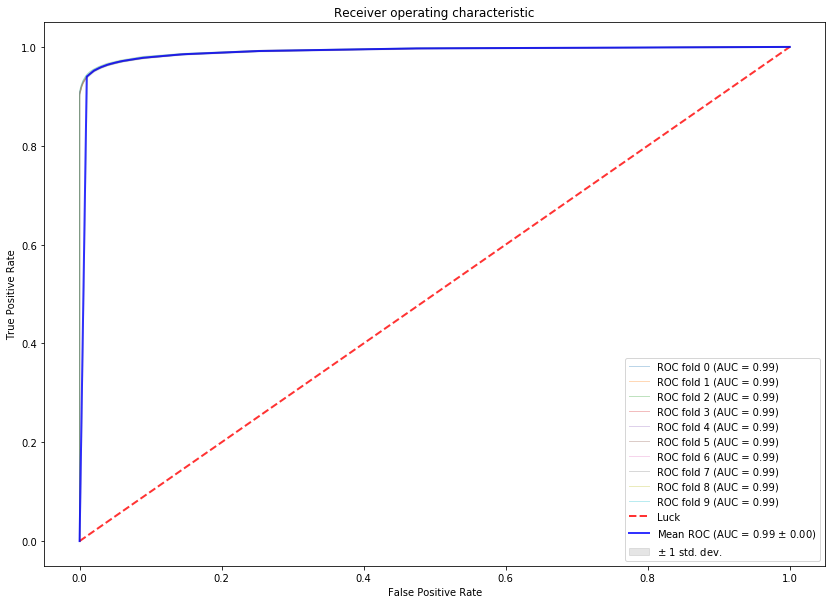

,AUC Train,AUC Test
0,1.0,0.991634
1,1.0,0.991826
2,1.0,0.993129
3,1.0,0.992555
4,1.0,0.992065
5,1.0,0.992091
6,1.0,0.992018
7,1.0,0.991673
8,1.0,0.992071
9,1.0,0.992803


In [234]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    print(f'fold {i} in process')
    print('fitting...')
    clf.fit(X_train.iloc[train], y_train.iloc[train])
    print('computing train roc auc...')
    _, _, auc_score_train = compute_roc_auc(train)
    print('computing test roc auc...')
    fpr, tpr, auc_score = compute_roc_auc(test)
    print('appending socres')
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])


### Analyze random forest results

In [235]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.9875951881690762


array([[314178,     61],
       [  4435,  43766]])

In [236]:
clf.feature_importances_


array([0.0624846 , 0.04060229, 0.05029301, 0.06310145, 0.17272782,
       0.41094833, 0.19984252])

In [237]:
X_test.columns


Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp'],
      dtype='object')

In [238]:
import sklearn.feature_selection


In [239]:
sklearn.feature_selection.chi2(X_train, y_train)


(array([1.12022622e+17, 2.15258409e+09, 8.83380544e+08, 7.53259563e+05,
        9.34132218e+09, 5.54222873e+09, 1.01753650e+10]),
 array([0., 0., 0., 0., 0., 0., 0.]))

In [240]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [241]:
kbest_model = SelectKBest(chi2, 'all').fit(X_train, y_train)


In [242]:
kbest_model.scores_


array([1.12022622e+17, 2.15258409e+09, 8.83380544e+08, 7.53259563e+05,
       9.34132218e+09, 5.54222873e+09, 1.01753650e+10])

### Logistic Regression with Cross Validation

In [274]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced').fit(X_train, y_train)

In [275]:
y_pred = clf.predict(X_test)

In [276]:
accuracy_score(y_test, y_pred)

0.8670097119523231

In [277]:
clf.coef_

array([[-7.70124039e-18, -1.40602682e-25, -6.80580477e-26,
        -2.49135962e-29, -3.43788189e-25,  1.77432499e-26,
         4.53132585e-24]])

## Step 4: Analyze Features

### size

In [246]:
canonical_df['size'].describe()


count    1.572046e+06
mean     2.125502e+04
std      1.169464e+04
min      5.180000e+02
25%      1.273600e+04
50%      2.236700e+04
75%      2.981100e+04
max      5.355760e+05
Name: size, dtype: float64

In [245]:
uncle_df['size'].describe()


count    81202.000000
mean       539.661782
std          6.076964
min        518.000000
25%        538.000000
50%        541.000000
75%        545.000000
max        553.000000
Name: size, dtype: float64

In [247]:
forked_df['size'].describe()

count     94483.000000
mean      19430.001069
std       12794.332241
min         517.000000
25%        8729.000000
50%       20817.000000
75%       29016.000000
max      426087.000000
Name: size, dtype: float64

In [248]:
broadcast_df['size'].describe()

count    6.446700e+04
mean     1.580268e+05
std      1.274961e+05
min      1.054000e+03
25%      5.890000e+04
50%      1.565490e+05
75%      2.429330e+05
max      4.042178e+06
Name: size, dtype: float64

### miner

We group miners and count their canonical blocks,   
and then, show their performance, which is performance = canonical number / (canonical number + non canonical number)

In [252]:
# dict['miner_addr'] = counter
non_canonical_miner_dict = dict()  
canonical_miner_dict = dict()

# count non canonical blocks for miners
for miner_addr in uncle_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1

for miner_addr in forked_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1
        
for miner_addr in broadcast_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1
        
# count canonical blocks for miners
for miner_addr in canonical_df.miner:
    if miner_addr in canonical_miner_dict:
        canonical_miner_dict[miner_addr] += 1
    else:
        canonical_miner_dict[miner_addr] = 1

List the miners who create most non canonical blocks

In [253]:
sorted(non_canonical_miner_dict.items(), key=lambda kv: kv[1], reverse=True)

[('0xea674fdde714fd979de3edf0f56aa9716b898ec8', 36975),
 ('0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', 30266),
 ('0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', 23591),
 ('0x829bd824b016326a401d083b33d092293333a830', 20553),
 ('0xb2930b35844a230f00e51431acae96fe543a0347', 14002),
 ('', 11295),
 ('0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c', 9802),
 ('0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8', 9492),
 ('0x52bc44d5378309EE2abF1539BF71dE1b7d7bE3b5', 7697),
 ('0x2a65aca4d5fc5b5c859090a6c34d164135398226', 6672),
 ('0x829BD824B016326A401d083B33D092293333A830', 5764),
 ('0xb2930B35844a230f00E51431aCAe96Fe543a0347', 4142),
 ('0x1b5b5906306c96b842dc03105e3b38636a4eda0b', 2869),
 ('0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01', 2228),
 ('0x2a5994b501e6a560e727b6c2de5d856396aadd38', 2041),
 ('0x61c808d82a3ac53231750dadc13c777b59310bd9', 1995),
 ('0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb', 1699),
 ('0x84a0d77c693adabe0ebc48f88b3ffff010577051', 1545),
 ('0x04668Ec2f57cC15c381b461B9fEDaB5D451c8F7F'

List the miners who create most canonical blocks

In [251]:
sorted(canonical_miner_dict.items(), key=lambda kv: kv[1], reverse=True)

[('0xea674fdde714fd979de3edf0f56aa9716b898ec8', 417480),
 ('0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', 353943),
 ('0x829bd824b016326a401d083b33d092293333a830', 190661),
 ('0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', 190257),
 ('0xb2930b35844a230f00e51431acae96fe543a0347', 88772),
 ('0x2a65aca4d5fc5b5c859090a6c34d164135398226', 27046),
 ('0x2a5994b501e6a560e727b6c2de5d856396aadd38', 22593),
 ('0x35f61dfb08ada13eba64bf156b80df3d5b3a738d', 20852),
 ('0x04668ec2f57cc15c381b461b9fedab5d451c8f7f', 20750),
 ('0x005e288d713a5fb3d7c9cf1b43810a98688c7223', 19225),
 ('0xd224ca0c819e8e97ba0136b3b95ceff503b79f53', 18427),
 ('0x09ab1303d3ccaf5f018cd511146b07a240c70294', 17333),
 ('0xaa5c4244f05c92781c4f259913319d8ba1acf05e', 13154),
 ('0x52e44f279f4203dcf680395379e5f9990a69f13c', 12214),
 ('0x4c549990a7ef3fea8784406c1eecc98bf4211fa5', 12049),
 ('0x06b8c5883ec71bc3f4b332081519f23834c8706e', 10796),
 ('0x9d6d492bd500da5b33cf95a5d610a73360fcaaa0', 10488),
 ('0x00192fb10df37c9fb26829eb2cc623cd1bf599e

Collect miners appearing in both canonical and non canonical datasets  
Calculate the miners performance

In [261]:
# performance = canonical / (canonical + non canonical)
# we have canonical and non canonical (uncle, forked and broadcast),
# miner_performance_dict = dict()  # dict[miner_addr] = performance
# for miner_addr, c_block_number in canonical_miner_dict.iter:

miner_performance_dict = dict()

for cur_miner, canonical_number in canonical_miner_dict.items():
    if cur_miner in non_canonical_miner_dict:
        miner_performance_dict[cur_miner] = canonical_number / (canonical_number + non_canonical_miner_dict[cur_miner])
#    else:
 #       miner_performance_dict[cur_miner] = 


List miners performance 

In [263]:
sorted(miner_performance_dict.items(), key=lambda kv: kv[1], reverse=True)      


[('0x9541b5a7beb445641990e8cf67ce8ad467ec930b', 0.9964664310954063),
 ('0x09e76074fa4e2d100d14d54c45a5558567d80c28', 0.987012987012987),
 ('0xf616d8d43635098d7a145d8bc5418d95d6a3d8c0', 0.9869791666666666),
 ('0x0f06d283513504c261ff789f33df1d93e9a5225c', 0.9833679833679834),
 ('0x7c6694032b4db11ac485e1cff0f7509d58b41569', 0.9800590841949779),
 ('0x8bf932fb121c3c278d62ad4d36fad2fc03a14bce', 0.9785932721712538),
 ('0xff1b891969773159366ab6310ff63a69ac4acffd', 0.9762675296655879),
 ('0xee2564013e07792478a289c7d2e2791a2d73fe3d', 0.9761904761904762),
 ('0xb3e2d691a9aa6a7895891243c63646326adb2a8e', 0.9714285714285714),
 ('0x2575188aa6fab4d7dd948544039b4231cf20badd', 0.967741935483871),
 ('0xb2d0cba76ed764c068d25bc9b620365fd5bf4a35', 0.9666666666666667),
 ('0x11a73b18557944fbde9f41c0c436069f870bd2eb', 0.9661016949152542),
 ('0xf3a71cc1be5ce833c471e3f25aa391f9cd56e1aa', 0.9615384615384616),
 ('0x1a496ef4a87299c3fa2da155f581242a1d0d40de', 0.9611650485436893),
 ('0x4b38a1f9c1a580fe29f150d738eac85

Set the performance bar  
Collect miners whose performance is higher than the bar

In [264]:
performance_boundary = 0.5
good_miner = dict()

for cur_miner, cur_performance in miner_performance_dict.items():
    if cur_performance >= performance_boundary:
        good_miner[cur_miner] = cur_performance     

List good miners with canoncial number and performance

In [266]:
for miner in canonical_miner_dict:
    if miner in good_miner:
        print(miner, ' ', canonical_miner_dict[miner], ' ', good_miner[miner])

0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c   353943   0.9212251665109354
0x2a5994b501e6a560e727b6c2de5d856396aadd38   22593   0.917147032556629
0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5   190257   0.8896833264748794
0x2a65aca4d5fc5b5c859090a6c34d164135398226   27046   0.8021234948692093
0x829bd824b016326a401d083b33d092293333a830   190661   0.9026911094908482
0xea674fdde714fd979de3edf0f56aa9716b898ec8   417480   0.9186388091230154
0x35f61dfb08ada13eba64bf156b80df3d5b3a738d   20852   0.9408473582096286
0x70aec4b9cffa7b55c0711b82dd719049d615e21d   2513   0.8615015426808365
0xb2930b35844a230f00e51431acae96fe543a0347   88772   0.8637593165586627
0x3e8702685ed7826a55acb1c6eb4a6d74638d165c   96   0.9411764705882353
0x52e44f279f4203dcf680395379e5f9990a69f13c   12214   0.9175869581549094
0x09ab1303d3ccaf5f018cd511146b07a240c70294   17333   0.9206458809157062
0xff1b891969773159366ab6310ff63a69ac4acffd   1810   0.9762675296655879
0x06b8c5883ec71bc3f4b332081519f23834c8706e   10796   0.92100324176

For miners not appearing in good miner, we find their canonical blocks numbers are pretty small. So we can ignore them.

In [267]:
for miner in canonical_miner_dict:
    if miner not in good_miner:
        print(canonical_miner_dict[miner])

28
1
38
34
1
1
1
3
17
16
11
1
2
22
7
1
1
1
1
1
1
1
26
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
5
1
1
1
1
1
1
1
1
1
6
1
1
16
11
1
1
1
1
1
1
1
1
1
1
11
5
4
1
1
1
1
1
1
1
1
1
3
9
1
1
6
1
1
1
1
1
1
1
1
1
1
1
7
1
1
1
1
1
1
1
1
1
1
57
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
2
1
3
17
1
1
1
1
1
1
1
1
1
1
25
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
25
1
1
1
1
1
1
1
1
1
1
20
1
11
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
45
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
14
9
59
1
2
37
1
1
1
19
19
23
1
37
22
1
3
1
1
1
3
1
1


### Analyze relationship between factors and the corresponding value 

In [278]:
from scipy import stats

In [279]:
stats.pearsonr(result.timestamp.to_numpy(), result.label.to_numpy())

(-0.30414423503104915, 0.0)

In [287]:
stats.pearsonr(result.gasLimit.to_numpy(), result.label.to_numpy())

(-0.2623883112084949, 0.0)

In [288]:
stats.pearsonr(result.gasUsed.to_numpy(), result.label.to_numpy())

(-0.02557144910533309, 9.173872111352913e-260)

In [291]:
stats.pearsonr(result.miner.to_numpy(), result.label.to_numpy())

(-0.06438982829823495, 0.0)

In [292]:
result.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp', 'label'],
      dtype='object')